In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

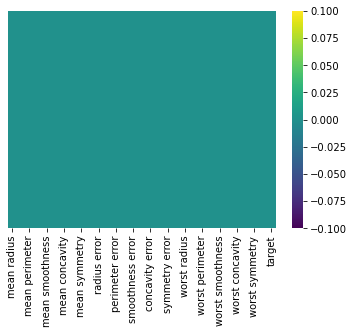

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
plt.show()

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
from scipy.stats import skew

mean radius
Skewness: 0.9398934455576345


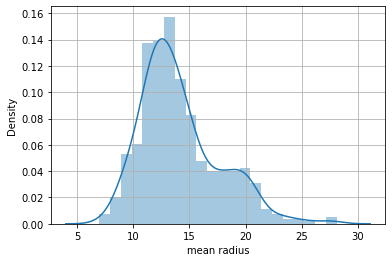

mean texture
Skewness: 0.6487335672867015


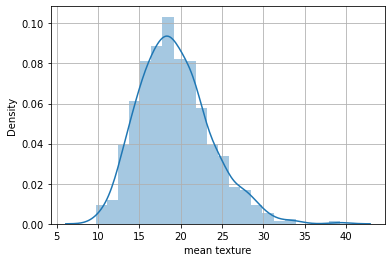

mean perimeter
Skewness: 0.9880369541677213


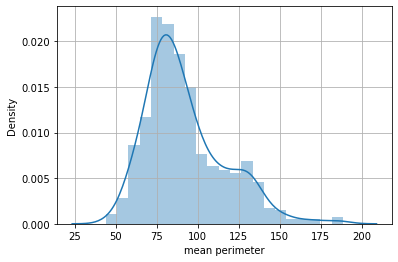

mean area
Skewness: 1.6413905092044112


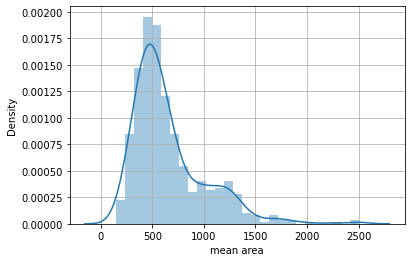

mean smoothness
Skewness: 0.4551199203571759


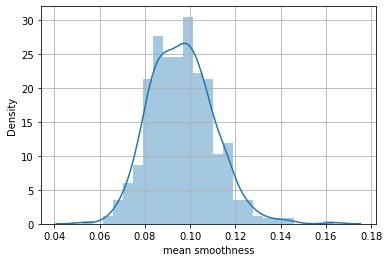

mean compactness
Skewness: 1.1869833239745227


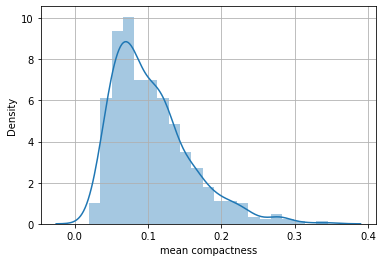

mean concavity
Skewness: 1.3974832352826647


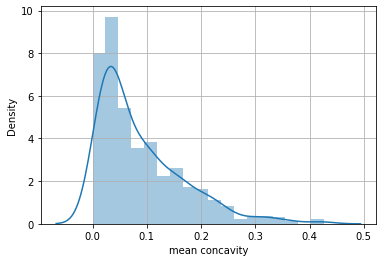

mean concave points
Skewness: 1.1680903481012592


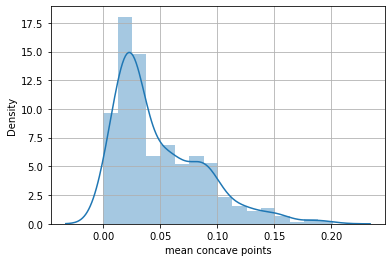

mean symmetry
Skewness: 0.7236947177154984


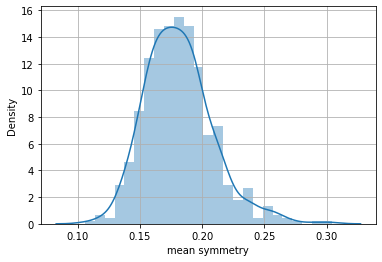

mean fractal dimension
Skewness: 1.3010473927890847


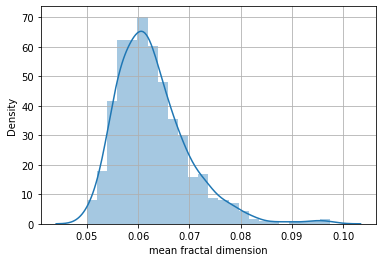

radius error
Skewness: 3.080463985335205


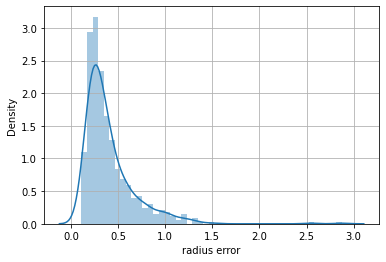

texture error
Skewness: 1.6421002649479612


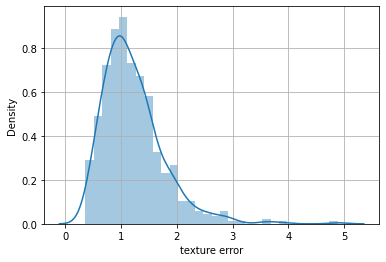

perimeter error
Skewness: 3.4345304746147054


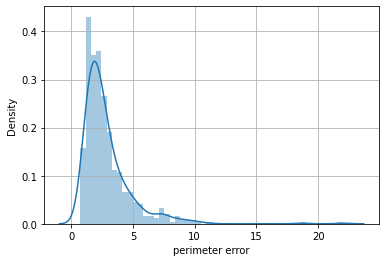

area error
Skewness: 5.432815862951913


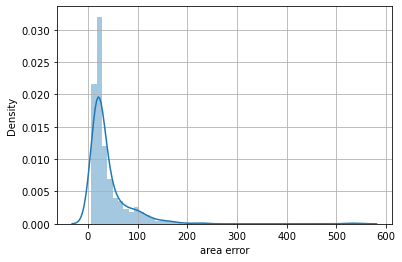

smoothness error
Skewness: 2.3083442210459797


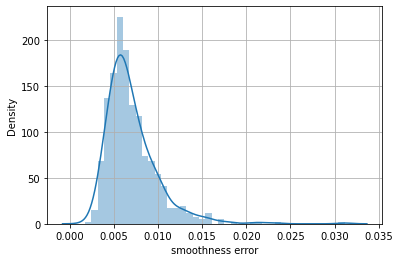

compactness error
Skewness: 1.8972023914083853


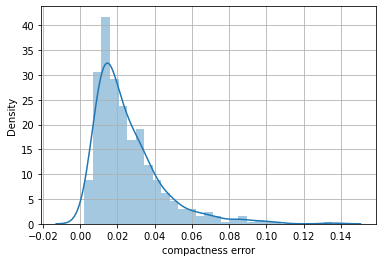

concavity error
Skewness: 5.096980949017034


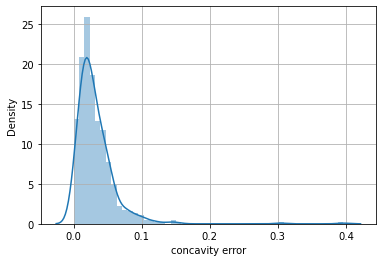

concave points error
Skewness: 1.440866886291701


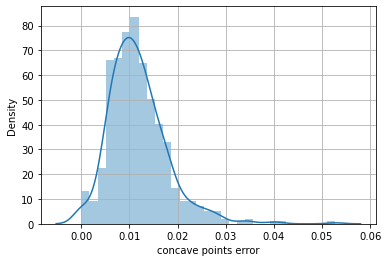

symmetry error
Skewness: 2.189341838925832


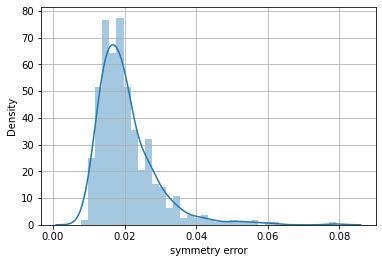

fractal dimension error
Skewness: 3.9136166546752627


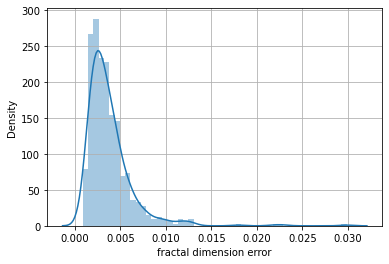

worst radius
Skewness: 1.1002050372722139


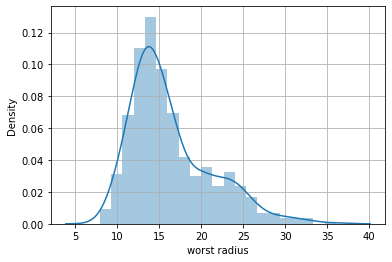

worst texture
Skewness: 0.4970066697616781


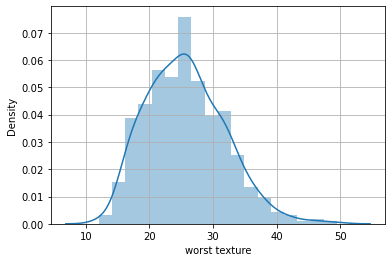

worst perimeter
Skewness: 1.1251876208771259


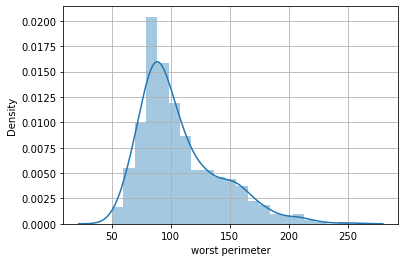

worst area
Skewness: 1.8544679916096252


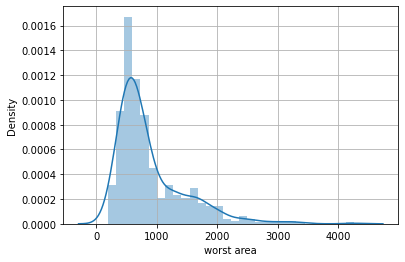

worst smoothness
Skewness: 0.41433004572342996


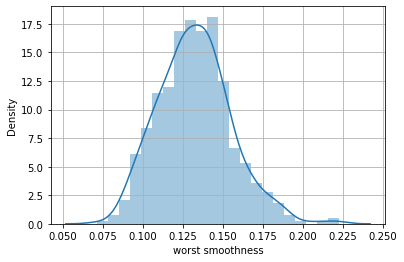

worst compactness
Skewness: 1.4696674610957545


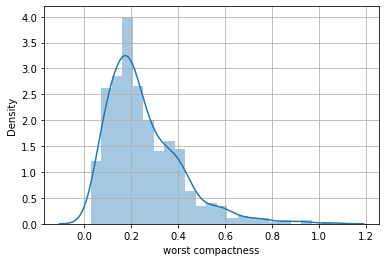

worst concavity
Skewness: 1.147202339994203


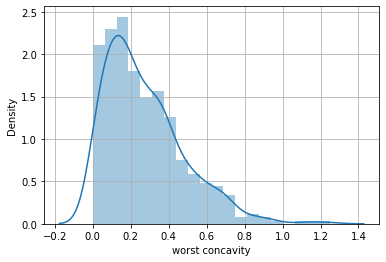

worst concave points
Skewness: 0.49131593979439675


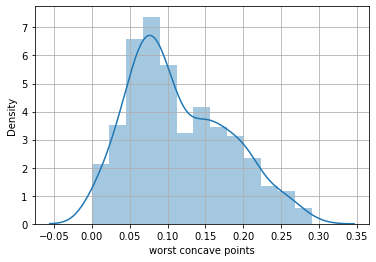

worst symmetry
Skewness: 1.430144867754064


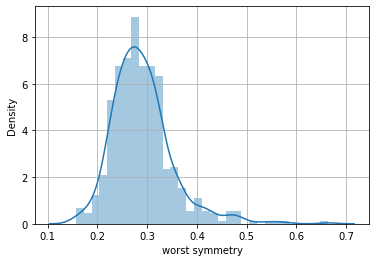

worst fractal dimension
Skewness: 1.6581931550477522


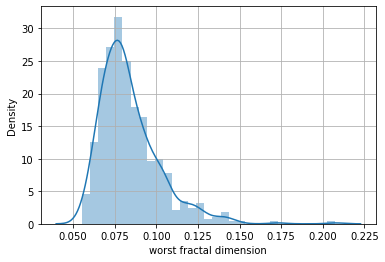

target
Skewness: -0.5270671676029054


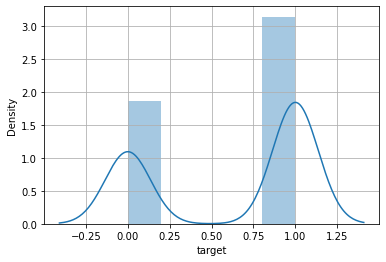

In [10]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

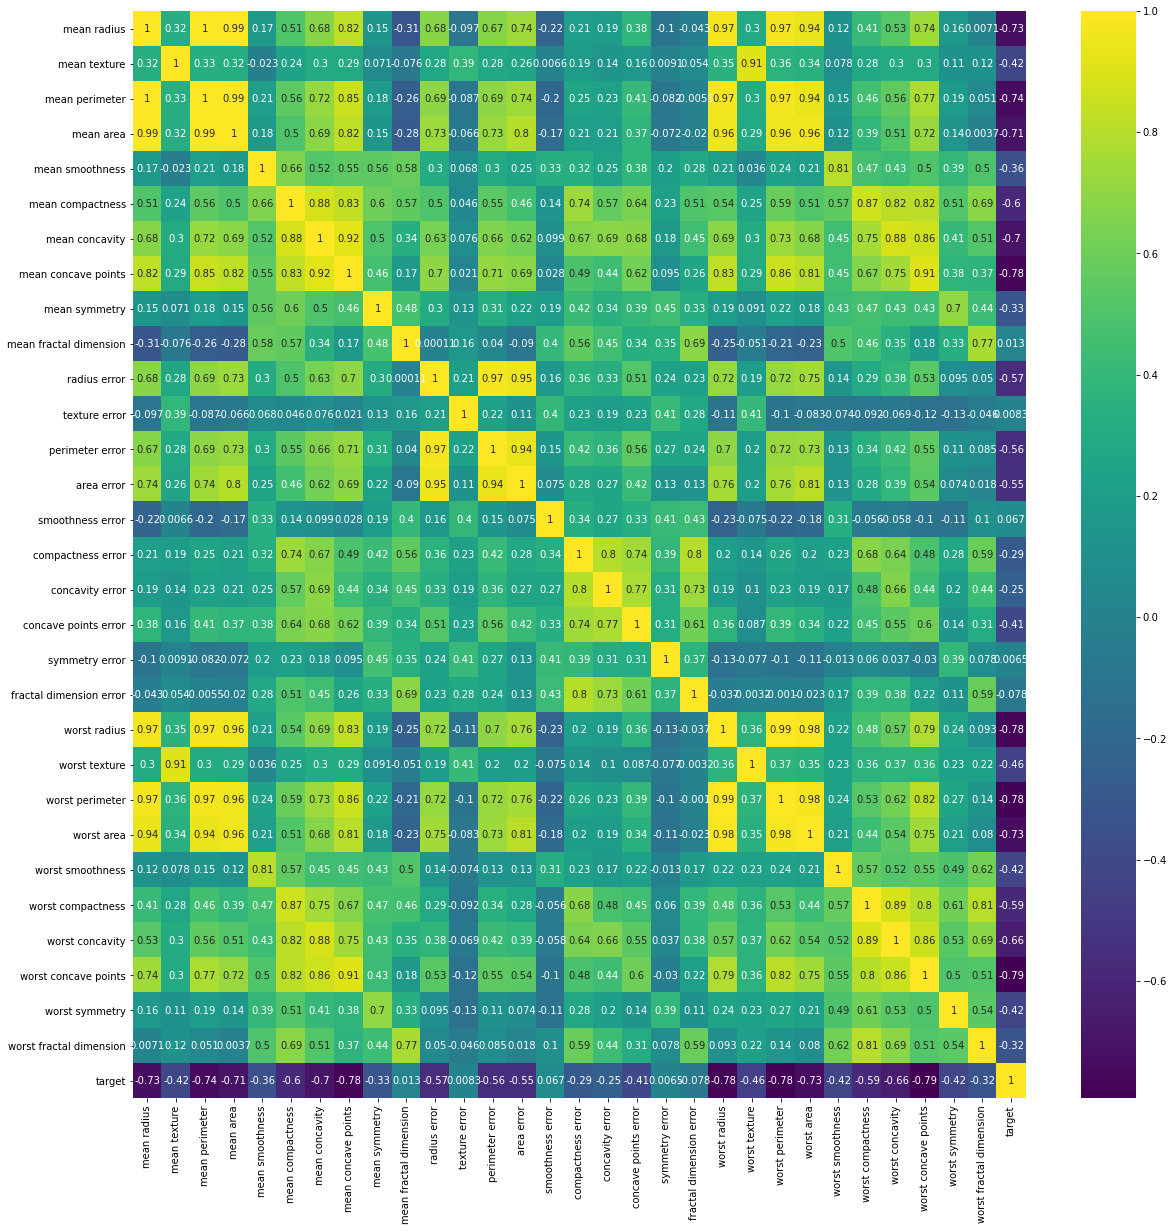

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [12]:
df.corr()["target"].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [13]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [14]:
x=df.iloc[ : , :-1]
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y=df.iloc[ : ,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [19]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [20]:
accuracy_score(ytest,ypred)

0.9370629370629371

In [21]:
confusion_matrix(ytest,ypred)

array([[50,  5],
       [ 4, 84]], dtype=int64)

#### Hyper-Parameter Tuning

In [22]:
accuracy=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

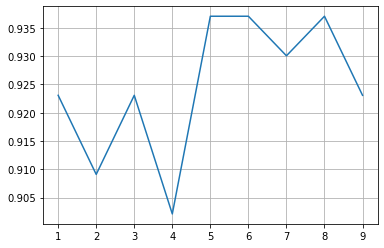

In [23]:
plt.plot(range(1,10),accuracy)
plt.grid(True)
plt.show()

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [26]:
accuracy_score(ytest,ypred)

0.9370629370629371

In [27]:
confusion_matrix(ytest,ypred)

array([[50,  5],
       [ 4, 84]], dtype=int64)

#### Cross Validation Score

In [28]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
CVS Mean: 0.9279459711224964
CVS Standard Deviation: 0.02176276406544814


#### Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.94      0.94      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [31]:
accuracy_score(ytest,ypred)

0.9300699300699301

In [32]:
confusion_matrix(ytest,ypred)

array([[50,  5],
       [ 5, 83]], dtype=int64)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        55
           1       0.95      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [35]:
accuracy_score(ytest,ypred)

0.9440559440559441

In [36]:
confusion_matrix(ytest,ypred)

array([[51,  4],
       [ 4, 84]], dtype=int64)

#### Hyper-Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params={
    "C":np.logspace(-3,3,7),
    "solver": ["liblinear","sag","saga","lbfgs","newton-cg"],
    "penalty":["l1","l2","elasticnet"]
}

In [39]:
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l

[CV 4/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END ...........C=0.

[CV 2/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.2s
[CV 3/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.1s
[CV 4/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.2s
[CV 1/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END ...............C=10.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...............C=10.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.1s
[CV 2/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.7s
[CV 3/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.3s
[CV 4/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.1s
[CV 1/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ..............C

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga', 'lbfgs',
                                    'newton-cg']},
             verbose=3)

In [40]:
grid.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [41]:
grid.best_score_

0.9531053351573189

In [42]:
grid.best_estimator_

LogisticRegression(C=100.0, solver='liblinear')

In [43]:
logreg=LogisticRegression(C=100.0, solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [45]:
accuracy_score(ytest,ypred)

0.958041958041958

In [46]:
confusion_matrix(ytest,ypred)

array([[52,  3],
       [ 3, 85]], dtype=int64)

#### Cross Validation Score

In [47]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.93859649 0.92982456 0.96491228 0.94736842 0.97345133]
CVS Mean: 0.9508306163639186
CVS Standard Deviation: 0.016204350027295856


#### Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [50]:
accuracy_score(ytest,ypred)

0.958041958041958

In [51]:
confusion_matrix(ytest,ypred)

array([[52,  3],
       [ 3, 85]], dtype=int64)

# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.94      0.97      0.96        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [54]:
accuracy_score(ytest,ypred)

0.9440559440559441

In [55]:
confusion_matrix(ytest,ypred)

array([[50,  5],
       [ 3, 85]], dtype=int64)

#### Cross Validation Score

In [56]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
CVS Mean: 0.9385188635305075
CVS Standard Deviation: 0.014585994424363306


#### Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.94      0.97      0.96        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [59]:
accuracy_score(ytest,ypred)

0.9440559440559441

In [60]:
confusion_matrix(ytest,ypred)

array([[50,  5],
       [ 3, 85]], dtype=int64)

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [63]:
accuracy_score(ytest,ypred)

0.9440559440559441

In [64]:
confusion_matrix(ytest,ypred)

array([[49,  6],
       [ 2, 86]], dtype=int64)

#### Hyper-Parameter Tuning

###### Criterion-->"Gini"

In [65]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.972027972027972 12


Min Samples Leaf Tuning

In [66]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.972027972027972 1


###### Criterion-->"Entropy"

In [67]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.958041958041958 16


In [68]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.951048951048951 2


In [69]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=6)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [70]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [71]:
accuracy_score(ytest,ypred)

0.972027972027972

In [72]:
confusion_matrix(ytest,ypred)

array([[52,  3],
       [ 1, 87]], dtype=int64)

#### Cross Validation Score

In [73]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.9122807  0.9122807  0.9122807  0.95614035 0.91150442]
CVS Mean: 0.9208973761838223
CVS Standard Deviation: 0.017624051951830574


#### Bagging

In [74]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.96      0.97      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [76]:
accuracy_score(ytest,ypred)

0.951048951048951

In [77]:
confusion_matrix(ytest,ypred)

array([[51,  4],
       [ 3, 85]], dtype=int64)

#### Tree Depiction

In [78]:
from sklearn import tree

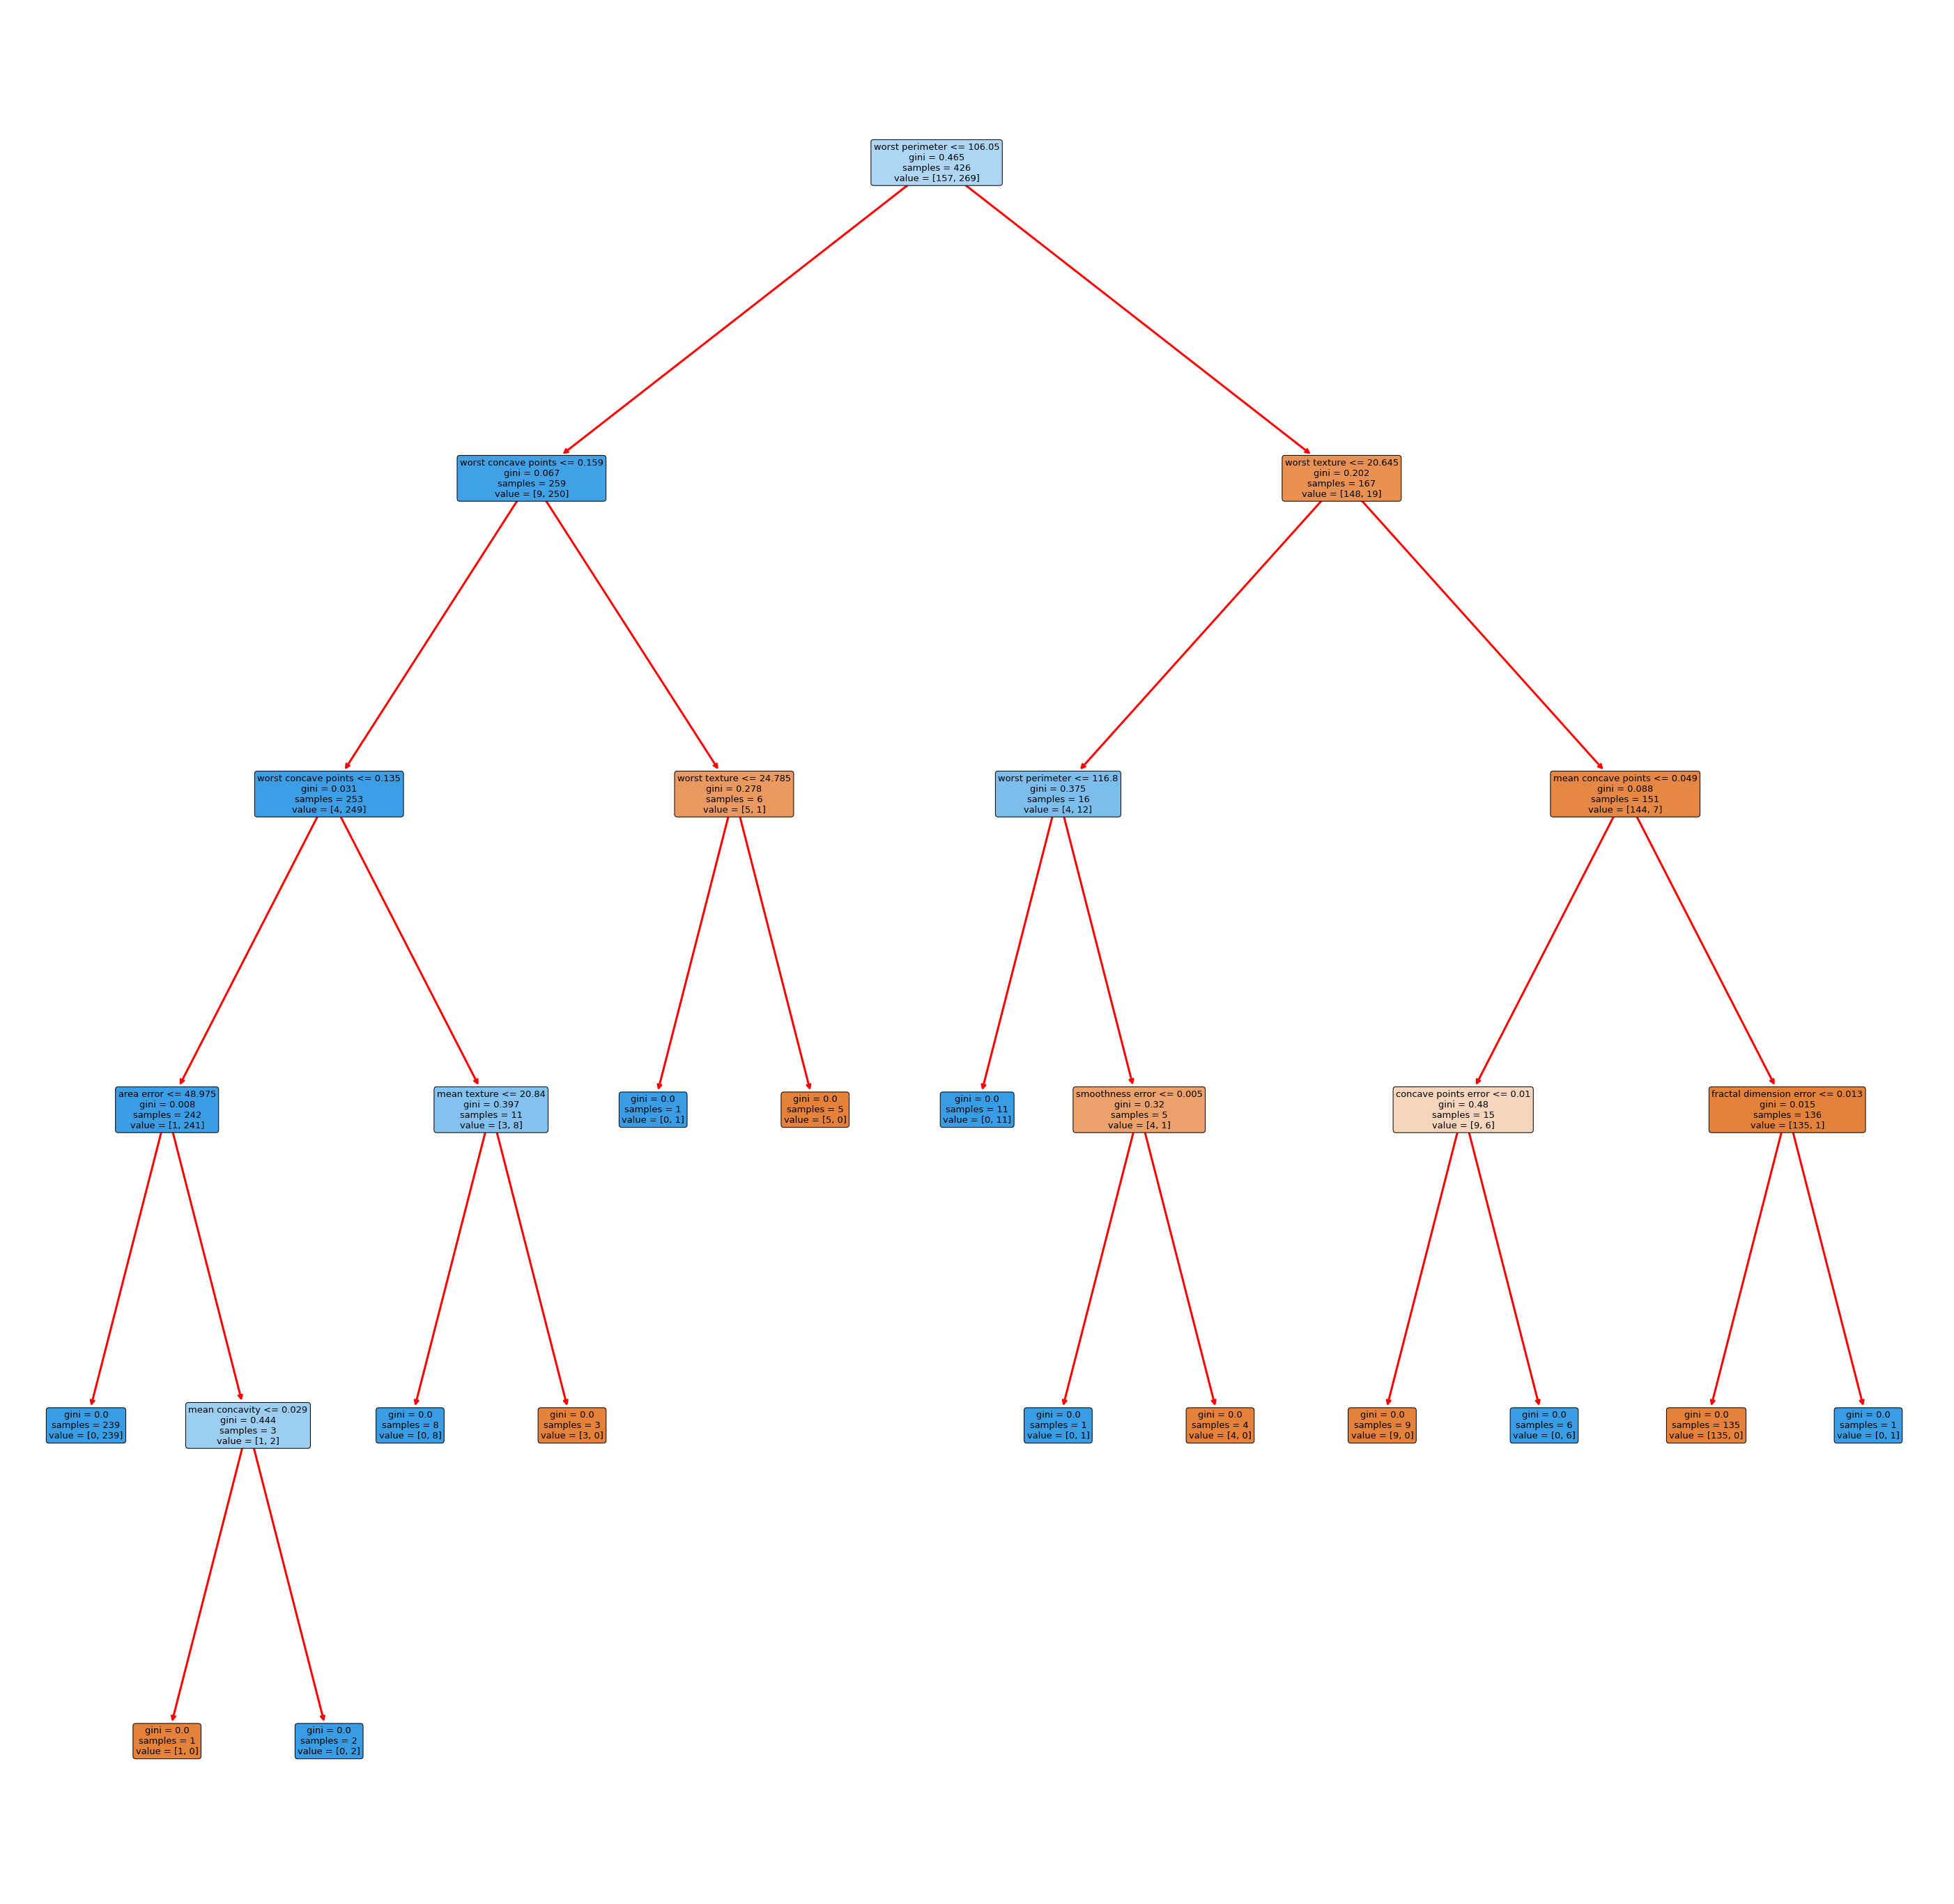

In [79]:
fig, ax= plt.subplots(figsize=(50,50))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)

# Random Forest 

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [81]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.94      0.97      0.96        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [82]:
accuracy_score(ytest,ypred)

0.9440559440559441

In [83]:
confusion_matrix(ytest,ypred)

array([[50,  5],
       [ 3, 85]], dtype=int64)

#### Cross Validation Score

In [84]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.92982456 0.95614035 0.98245614 0.97368421 0.98230088]
CVS Mean: 0.9648812296227295
CVS Standard Deviation: 0.019975922004699873


# Support Vector Classifier

In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

###### Kernel-->"rbf"

In [86]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [87]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.96      0.97      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [88]:
accuracy_score(ytest,ypred)

0.951048951048951

In [89]:
confusion_matrix(ytest,ypred)

array([[51,  4],
       [ 3, 85]], dtype=int64)

###### Kernel-->"linear"

In [90]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [92]:
accuracy_score(ytest,ypred)

0.958041958041958

In [93]:
confusion_matrix(ytest,ypred)

array([[52,  3],
       [ 3, 85]], dtype=int64)

#### Hyper-Parameter Tuning

In [94]:
params={
    "C": np.logspace(-3,3,7),
    "gamma": np.logspace(-3,3,7),
    "kernel": ["linear"]
}

In [95]:
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ............C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ............C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ............C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ............C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ............C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ..............C=0.001, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.001, gamma=0.1, 

[CV 5/5] END .............C=0.1, gamma=1000.0, kernel=linear; total time=   0.0s
[CV 1/5] END ..............C=1.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=1.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=1.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=1.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=1.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=1.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=1.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ...............C=1.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=1.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=1.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=1.0, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...........C=100.0, gamma=1000.0, kernel=linear; total time=   0.0s
[CV 3/5] END ...........C=100.0, gamma=1000.0, kernel=linear; total time=   0.0s
[CV 4/5] END ...........C=100.0, gamma=1000.0, kernel=linear; total time=   0.0s
[CV 5/5] END ...........C=100.0, gamma=1000.0, kernel=linear; total time=   0.0s
[CV 1/5] END ...........C=1000.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ...........C=1000.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ...........C=1000.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ...........C=1000.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ...........C=1000.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ............C=1000.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ............C=1000.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ............C=1000.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ............C=1

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear']},
             verbose=3)

In [96]:
grid.best_score_

0.9719015047879618

In [97]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [98]:
grid.best_estimator_

SVC(C=0.1, gamma=0.001, kernel='linear')

In [99]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [100]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [101]:
accuracy_score(ytest,ypred)

0.958041958041958

In [102]:
confusion_matrix(ytest,ypred)

array([[52,  3],
       [ 3, 85]], dtype=int64)

#### Cross Validation Score

In [103]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.93859649 0.94736842 0.98245614 0.92105263 0.95575221]
CVS Mean: 0.9490451793199813
CVS Standard Deviation: 0.02028223823824822


#### Bagging

In [104]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [105]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [106]:
accuracy_score(ytest,ypred)

0.972027972027972

In [107]:
confusion_matrix(ytest,ypred)

array([[52,  3],
       [ 1, 87]], dtype=int64)

# Outcome